# Visualization

Trong bài tập này, bạn sẽ được rèn luyện kĩ năng trực quan hóa. Trực quan hóa ngoài việc hỗ  trợ trong khâu tiền xử lí dữ liệu, còn giúp bạn phân tích và rút ra được các thông tin có ý nghĩa từ dữ liệu

**Tập dữ liệu** được sử dụng được lấy từ trang batdongsan.com.vn

In [ ]:
#Import các thư viện cần thiết

import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
import warnings; warnings.filterwarnings(action='once')
import random
import math

In [11]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [12]:
from google.colab import files
uploaded = files.upload()

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


Saving batdongsan.com.vn.csv to batdongsan.com.vn.csv


In [14]:
#Load dữ liệu từ file
newdf = pd.read_csv("batdongsan.com.vn.csv", dtype = {"month": "string" , "id" : "string"})
print("DONE")

DONE


In [ ]:
newdf.columns

Index(['id', 'month', 'project', 'investor', 'square', 'bedrooms', 'bathrooms',
       'direction', 'balcony', 'district', 'ward', 'price'],
      dtype='object')

In [21]:
# Xem 5 hàng dữ liệu đầu tiên, các thông tin ban đầu: df.info(), df.describe(), ...
print(newdf.head(5))
print("\n ---------------------------------------------------------------------------------------------------------------------\n")
print(newdf.info())
print("\n ---------------------------------------------------------------------------------------------------------------------\n")
print(newdf.describe())

         id month                     project  \
0  28086120    12  Vinhomes Smart City Đại Mỗ   
1  28088954    12               Goldmark City   
2  28097966    12        Chung cư IEC Tứ Hiệp   
3  27895887    12         Vinhomes D'Capitale   
4  28056031    12           The Zen Residence   

                                            investor  square  bedrooms  \
0                                  Tập đoàn Vingroup    60.0       3.0   
1  Công ty TNHH Thương mại - Quảng cáo - Xây dựng...   121.0       3.0   
2                                                NaN    70.0       2.0   
3                               Tân Hoàng Minh Group    39.0       1.0   
4                  Công ty TNHH Gamuda Land Việt Nam    97.0       3.0   

   bathrooms direction   balcony     district        ward   price  
0        1.0  Đông-Nam   Tây-Bắc  nam tu liem      dai mo  1560.0  
1        2.0       NaN       NaN  bac tu liem    phu dien  3300.0  
2        2.0   Tây-Bắc  Đông-Nam    thanh tri     tu hie

Đưa ra các câu lệnh để thực hiện các yêu cầu sau:

1. Minh họa boxblot của các trường số như price, bedrooms, square, ...

* Gợi ý: sns.boxplot(data_field)

<Axes: ylabel='price'>

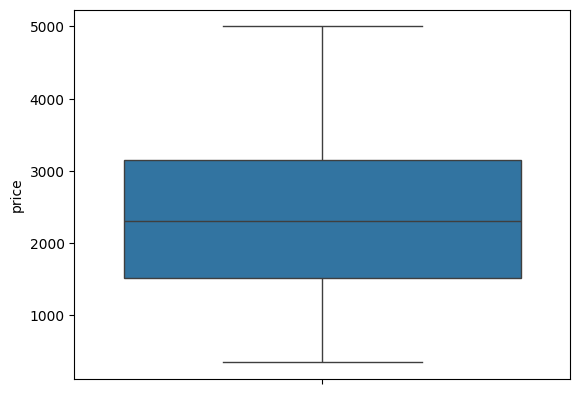

In [25]:
#Code for 'price' field
sns.boxplot(newdf['price'])

<Axes: ylabel='square'>

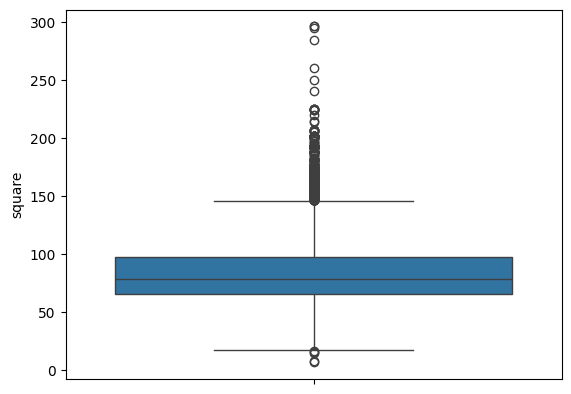

In [24]:
#Code for 'square' field
sns.boxplot(newdf['square'])

<Axes: ylabel='bedrooms'>

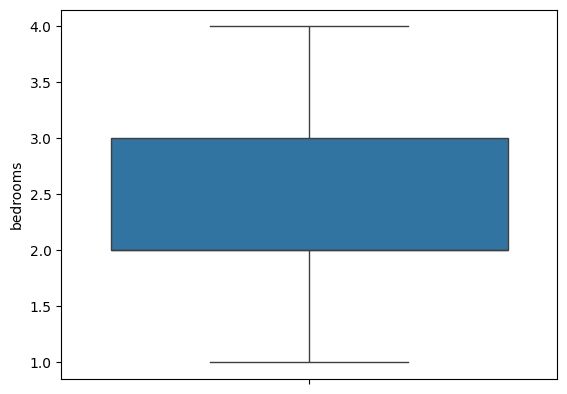

In [27]:
#Code for 'bedrooms' field
sns.boxplot(newdf['bedrooms'])

<Axes: ylabel='bathrooms'>

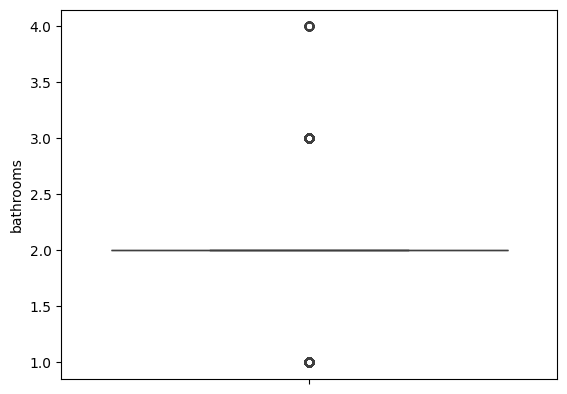

In [28]:
#Code for 'bathrooms' field
sns.boxplot(newdf['bathrooms'])

2. Cho đoạn code minh họa Biểu đồ thể hiện số bài đăng theo tháng của năm 2020. Hãy thực hiện các yêu cầu cho các câu hỏi dưới đây:

<ipython-input-29-090d516fabbf>:12: UserWarning: FixedFormatter should only be used together with FixedLocator
  plt.gca().set_xticklabels(df1['month'], rotation=60, horizontalalignment= 'right')


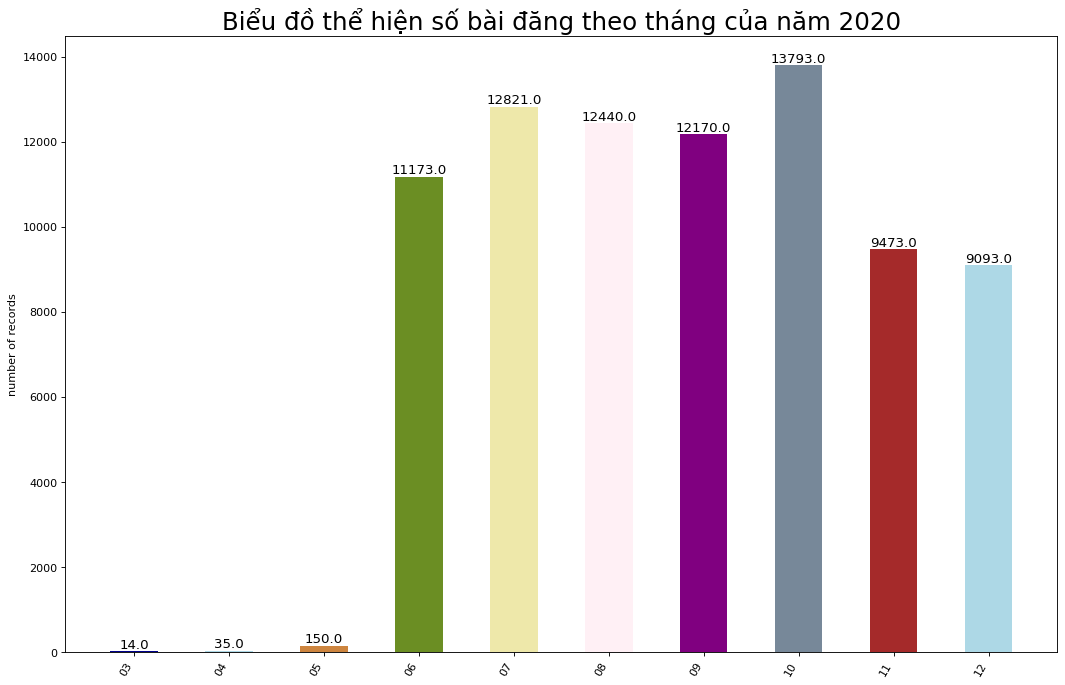

In [29]:
df1 = newdf.groupby('month').size().reset_index(name='number of records')
n = df1['month'].unique().__len__()+1
all_colors = list(plt.cm.colors.cnames.keys())
random.seed(100)
c = random.choices(all_colors, k=n)

plt.figure(figsize=(16,10), dpi= 80)
plt.bar(df1['month'], df1['number of records'], color=c, width=.5)
for i, val in enumerate(df1['number of records'].values):
    plt.text(i, val, float(val), horizontalalignment='center', verticalalignment='bottom', fontdict={'fontweight':500, 'size':12})

plt.gca().set_xticklabels(df1['month'], rotation=60, horizontalalignment= 'right')
plt.title("Biểu đồ thể hiện số bài đăng theo tháng của năm 2020", fontsize=22)
plt.ylabel('number of records')
plt.show()

* Biểu đồ thể hiện giá nhà đất trung bình theo tháng (VND/m2)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
<ipython-input-51-33d3f074a8a4>:7: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(
<ipython-input-51-33d3f074a8a4>:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


0          12
1          12
2          12
3          12
4          12
         ... 
81158      05
81159      05
81160      05
81161      05
81162    <NA>
Name: month, Length: 81163, dtype: string

-----------------------------------------



<Axes: xlabel='month', ylabel='average'>

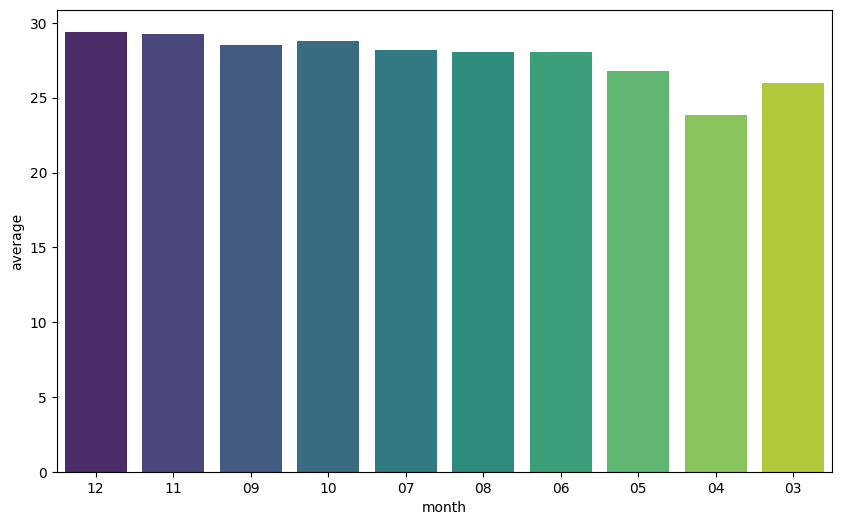

In [51]:
#Code ở đây
newdf['average'] = newdf['price']/newdf['square']
# Vẽ biểu đồ cột
plt.figure(figsize=(10, 6))
sns.barplot(
    x='month',
    y='average',
    data=newdf,
    palette='viridis',
    ci=None  # Không hiển thị khoảng tin cậy
)



* Biểu đồ mật độ giá nhà của tháng 4 và tháng 12 (VND/m2)

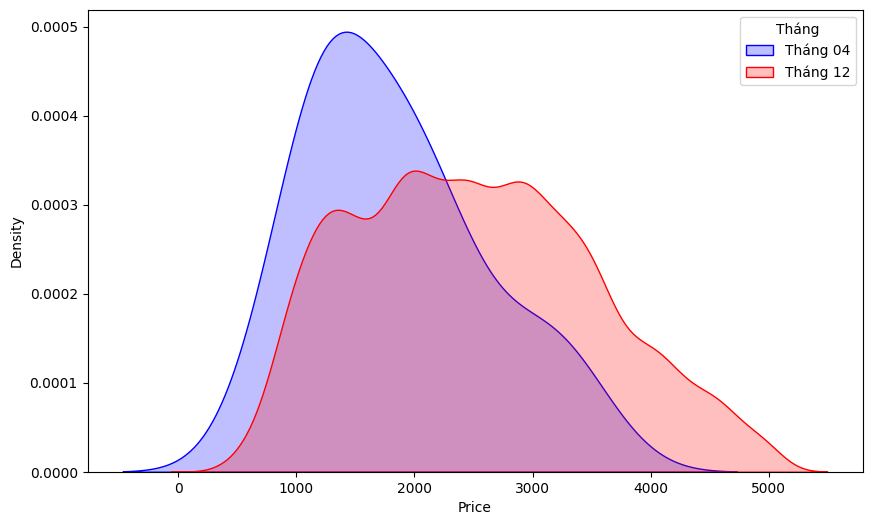

In [79]:

plt.figure(figsize=(10, 6))

# Biểu đồ mật độ cho tháng 04
sns.kdeplot(
    data=newdf[newdf['month'] == '04'],
    x='price',
    fill=True,
    color='blue',
    label='Tháng 04'  # Nhãn cho tháng 04
)

# Biểu đồ mật độ cho tháng 12
sns.kdeplot(
    data=newdf[newdf['month'] == '12'],
    x='price',
    fill=True,
    color='red',
    label='Tháng 12'  # Nhãn cho tháng 12
)

plt.legend(title='Tháng')

plt.xlabel('Price')
plt.ylabel('Density')
plt.show()


* Số lượng bất động sản phân theo số lượng bedrooms

Text(0, 0.5, 'Count')

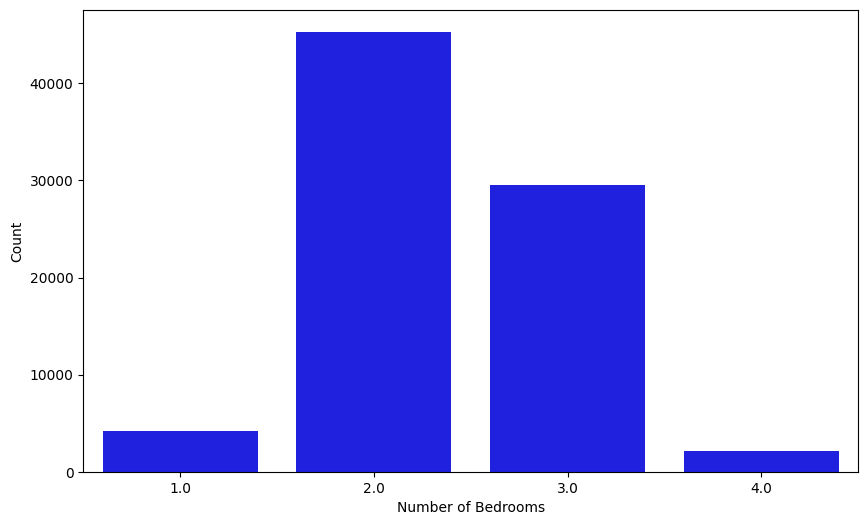

In [85]:
plt.figure(figsize=(10, 6))
bedroom_counts = newdf['bedrooms'].value_counts().sort_index()
sns.barplot(
    x=bedroom_counts.index,  # Số lượng phòng ngủ
    y=bedroom_counts.values,  # Số lượng nhà
    color='blue'
)

plt.xlabel('Number of Bedrooms')
plt.ylabel('Count')

* Giá bất động sản trung bình theo số lượng bedrooms

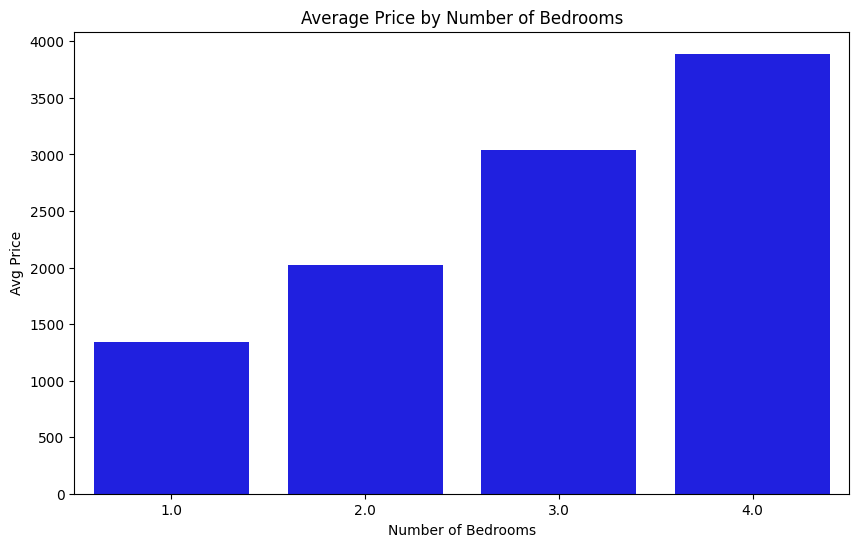

In [87]:
average_prices = newdf.groupby('bedrooms')['price'].mean().sort_index()

# Vẽ biểu đồ cột
plt.figure(figsize=(10, 6))
sns.barplot(
    x=average_prices.index,  # Số lượng phòng ngủ
    y=average_prices.values,  # Giá trung bình
    color='blue'
)

plt.xlabel('Number of Bedrooms')
plt.ylabel('Avg Price')
plt.title('Average Price by Number of Bedrooms')
plt.show()

* Giá nhà đất trung bình theo quận (VND/m2)

In [97]:
# Code ở đây
#print(newdf.head())
newdf.groupby('district')['price'].mean().round().astype(int).sort_values()



/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,price
district,
quoc oai,593
chuong my,687
thuong tin,707
thanh oai,805
thach that,832
me linh,1112
dan phuong,1118
hoai duc,1337
dong anh,1416


* Giá nhà đất trung bình theo các phường quận Hoàn Kiếm (VND/m2)

In [99]:
# Code ở đây
newdf[newdf['district'] == 'hoan kiem'].groupby('ward')['price'].mean().round().astype(int).sort_values()

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,price
ward,
chuong duong,1233
ly thai to,1450
hang buom,2050
hang ma,2100
cua dong,2150
dong xuan,2200
hang bo,2300
phan chu trinh,2475
tran hung dao,3018


* Giá nhà đất trung bình theo nhà đầu tư (VND/m2)

In [101]:
# Code
newdf.groupby('investor')['price'].mean().round().astype(int).sort_values()

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,price
investor,
Công ty CP Tập đoàn C.E.O,593
Công ty CP SIMCO Sông Đà,630
Công ty CP Lộc Ninh,687
Công ty TNHH Hacomland Duyên Thái,710
Công ty CP Đầu tư VIC,850
...,...
Công ty TNHH Nhà nước một thành viên Thăng Long GTC,4446
Công ty TNHH Indochina Land,4508
Công ty Liên doanh Hà Việt – Tungshing,4548


* Giá nhà đất trung bình theo dự án (VND/m2)

In [103]:
# Code ở đây
newdf.groupby('project')['average'].mean().round().astype(int).sort_values()


,average
project,
Tòa nhà Licogi 18,9
Tân Việt Tower,10
Sunny Garden City,10
Tiểu khu đô thị Nam La Khê,12
KĐT Mê Linh - Thanh Lâm - Đại Thịnh,12
...,...
Trúc Bạch Building,61
Hateco Laroma,62
Sun Grand City Quảng An Residence,64


* Giá bất động sản phân bố theo top 10 nhà đầu tư triệu /m2

In [106]:
# Code ở đây
top = newdf.groupby('investor')['price'].mean().round().astype(int).sort_values(ascending=False)
top.head(10)

,price
investor,
Công ty CP Hạ tầng và Bất động sản Việt Nam,4850
Tập đoàn BRG,4648
Công ty Liên doanh Hà Việt – Tungshing,4548
Công ty TNHH Indochina Land,4508
Công ty TNHH Nhà nước một thành viên Thăng Long GTC,4446
Công ty CP Đầu tư và Phát triển Thương mại Kinh Đô,4400
Công ty CP Đầu tư Xây dựng Dân dụng Hà Nội,4383
TTTM XNK Hàng tiêu dùng và Thủ công Mỹ nghệ Hà Nội,4339
Công ty CP Đầu tư Phát triển nhà Gia Bảo,4317


* Giá bất động sản phân bố theo dự án

In [108]:
newdf.groupby('project')['price'].mean().round().astype(int).sort_values(ascending=False)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,price
project,
Chung cư 379 Đội Cấn,5000
Hateco Laroma,4972
D’. Le Roi Soleil - Quảng An,4884
Platinum Residences,4850
Vinhomes Metropolis - Liễu Giai,4768
...,...
Khu đô thị Duyên Thái,710
Lộc Ninh Singashine,687
Tiểu khu đô thị mới Vạn Phúc,630


* Giá nhà đất trung bình theo hướng nhà (VND/m2)

In [110]:
newdf.groupby('direction')['price'].mean().round().astype(int).sort_values(ascending=False)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,price
direction,
Nam,2855
Bắc,2778
Tây,2652
Đông,2549
Tây-Nam,2299
Đông-Bắc,2253
Tây-Bắc,2252
Đông-Nam,2203


In [ ]:
# Code ở đây

3. Tương quan giữa các trường thuộc tính

* https://vi.wikipedia.org/wiki/H%E1%BB%87_s%E1%BB%91_t%C6%B0%C6%A1ng_quan
* bieu do the hien he so tuong quan giua cac cap bien so thuc banggf biểu đồ heatmap

<Axes: >

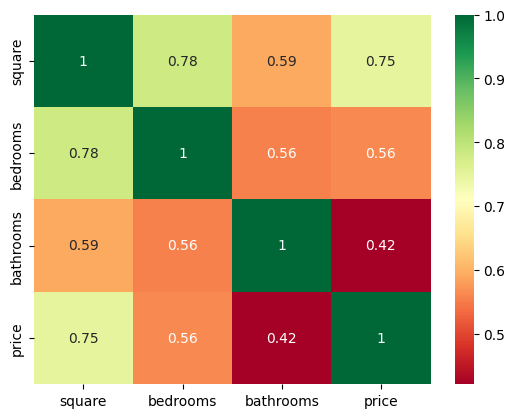

In [111]:
# Gợi ý: sns.heatmap(cmap='RdYlGn', ...)
numeric_columns = ['square','bedrooms','bathrooms','price']

correlation_matrix = newdf[numeric_columns].corr()
correlation_matrix
sns.heatmap(correlation_matrix,annot=True, cmap='RdYlGn')


* bieu do the hien moi quan he giua cac bien so thuc với biểu đồ phân tán

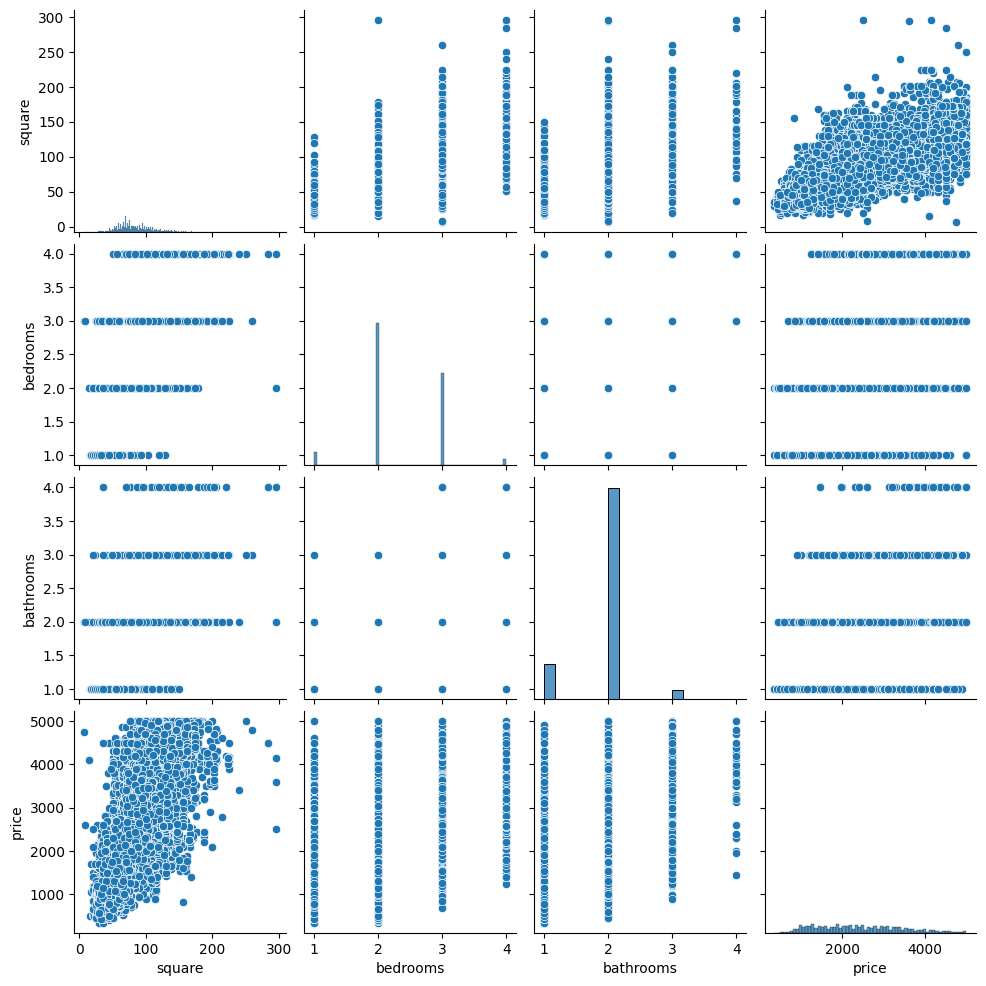

In [118]:
sns.pairplot(newdf[numeric_columns],kind='scatter')


4. Mật độ giá nhà trung bình theo quận

Text(0, 0.5, 'Mật độ')

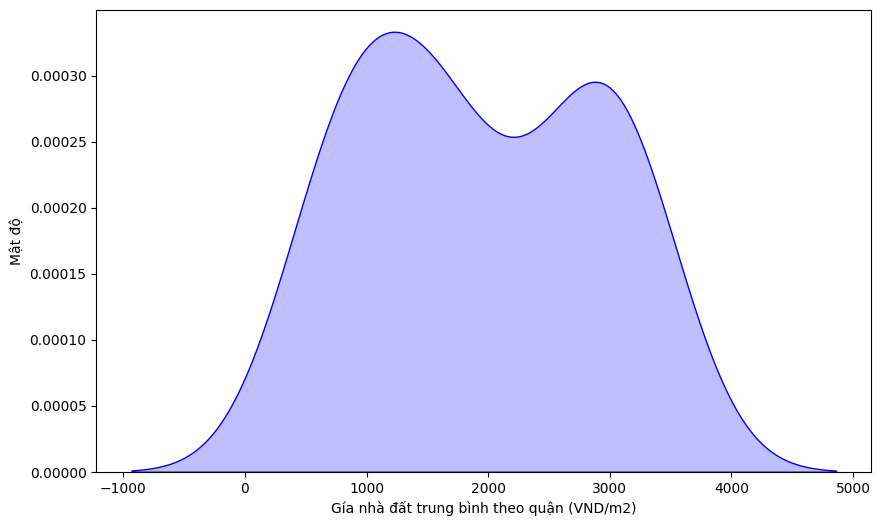

In [117]:
plt.figure(figsize=(10, 6))

val = newdf.groupby('district')['price'].mean().round().astype(int).sort_values(ascending=False)
# Biểu đồ mật độ cho tháng 04
sns.kdeplot(
    data= val.values,
    fill=True,
    color='blue',
)
plt.xlabel('Gía nhà đất trung bình theo quận (VND/m2)')
plt.ylabel('Mật độ')

End :))